### [Principal Component Analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis)

Principal Component Analysis (PCA) is a dimensionality reduction technique that is widely used in machine learning. It is used to reduce the number of features in a dataset while retaining the most important information. This is done by projecting the data onto a lower-dimensional subspace that maximizes the variance of the data.

In order to realise that PCA actually works 😅 we will try finding the best fit line for a 2-dimensional data using PCA.

**PCA Algorithm**

PCA algorithm consists of the following steps:

1. Standardize the data.
2. Compute the covariance matrix of the data.
3. Compute the eigenvectors and eigenvalues of the covariance matrix.
4. Sort the eigenvectors by decreasing eigenvalues.
5. Select the top k eigenvectors to form the projection matrix.
6. Project the data onto the lower-dimensional subspace.
7. Return the projected data.

**Optional Task** 

Understand the proof of correctness of PCA algorithm. Please reach out the mentors if you need any help.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def data1():
    x = [np.random.rand() for i in range(1000)]
    y = [x[i] + 0.05*np.random.rand() for i in range(1000)]
    return [x, y]

def data2():
    x = [np.random.rand() for i in range(1000)]
    y = [(x[i])**2 + 0.05*np.random.rand() for i in range(1000)]
    return [x, y]

# Standardisation of Data
def std_data(nparray):
    mean = np.mean(nparray, axis=0)
    std_dev = np.std(nparray, axis=0)
    standardized_data = (nparray - mean) / std_dev
    return standardized_data

Data 1:
Slope = 0.9999999999999993 Intercept = 0.024834032079971036


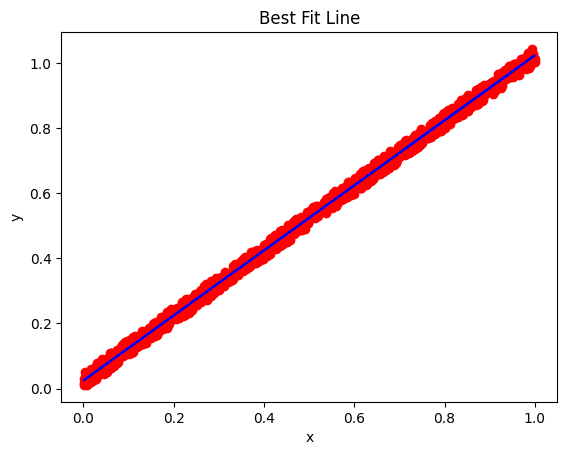

Data 2:
Slope = 1.0 Intercept = -0.14246128646484402


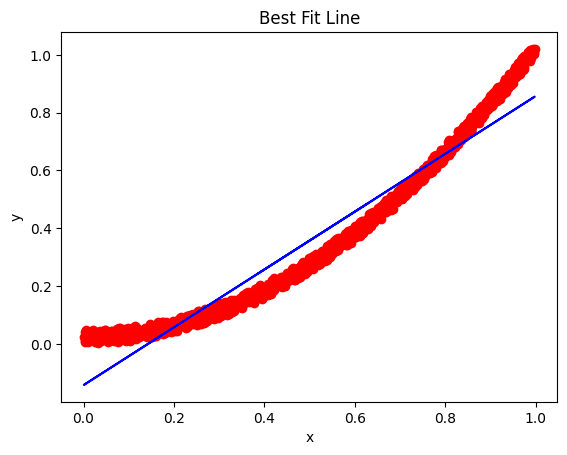

In [2]:
def DimReduction(arr):
    data_set = np.array(arr).T  # Transpose to have samples as rows and features as columns
    std_data_set = std_data(data_set)
    
    # Compute covariance matrix
    covariance_matrix = np.cov(std_data_set.T)
    
    # Compute eigenvectors and eigenvalues using np.linalg.eigh
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    # Ensure that the eigenvalues and eigenvectors are real
    eigenvalues = np.real(eigenvalues)
    eigenvectors = np.real(eigenvectors)
    
    # Sort the eigenvectors by decreasing eigenvalues
    idx = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, idx]
    
    # Select the top eigenvector
    principal_component = sorted_eigenvectors[:, 0]
    
    # Project the data onto the principal component
    projected_data = std_data_set @ principal_component
    
    # Calculate the slope (m) and intercept (c) of the best fit line
    slope = principal_component[1] / principal_component[0]
    mean = np.mean(data_set, axis=0)
    intercept = mean[1] - slope * mean[0]
    
    # Displaying the result using matplotlib
    plt.scatter(data_set[:, 0], data_set[:, 1], color = "red")
    plt.plot(data_set[:, 0], data_set[:, 0] * slope + intercept, color = "blue")
    print("Slope =", slope, "Intercept =", intercept)
    plt.title("Best Fit Line")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# Generate data
data1_x, data1_y = data1()
data2_x, data2_y = data2()

# Reduce dimensionality and plot for data1
print("Data 1:")
DimReduction([data1_x, data1_y])

# Reduce dimensionality and plot for data2
print("Data 2:")
DimReduction([data2_x, data2_y])

Slope = 1.0000000000000002 Intercept = 0.02452761485148336


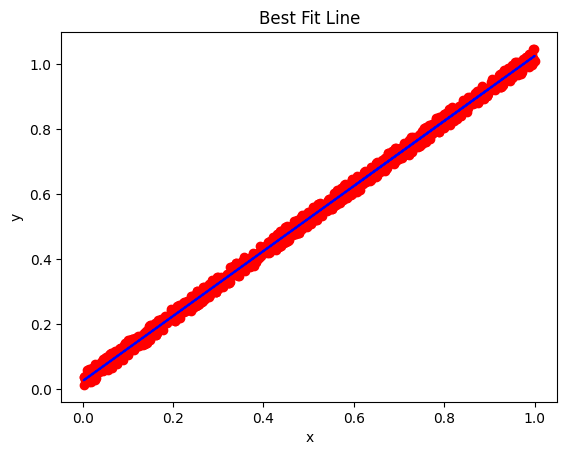

Slope = 0.9999999999999999 Intercept = -0.14322289021496692


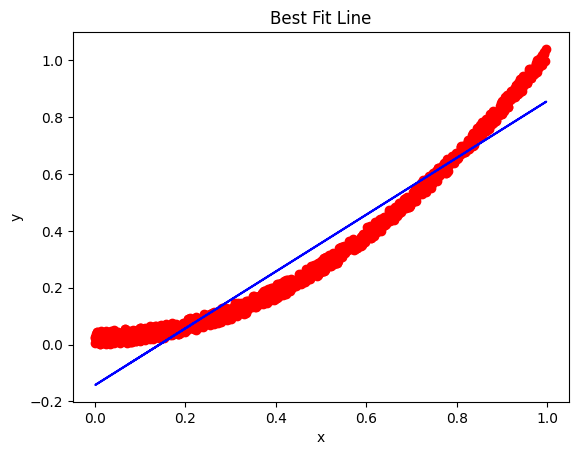

In [3]:
DimReduction(data1())
DimReduction(data2())